In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso
from utils import calculate_income_1000_customers
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
np.random.seed(0)
X = pd.read_csv('data/x_train.txt', sep=' ', header=None).to_numpy()
y = pd.read_csv('data/y_train.txt', sep=' ', header=None).to_numpy().ravel()

N_ITER = 5
TRAIN_SIZE = 0.8

model = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=2, n_estimators=100)

In [3]:
thresholds = [0, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.0075, 0.008, 0.0085, 0.009]

accuracies = {threshold: [] for threshold in thresholds} 
accuracies_top = {threshold: [] for threshold in thresholds} 
income = {threshold: [] for threshold in thresholds} 

for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    for threshold_value in thresholds:
        selector = SelectFromModel(RandomForestClassifier(), threshold=threshold_value)
        
        fit = selector.fit(X, y)
        selected = fit.get_support(indices=True)
        print("Threshold: ", threshold_value, ", Number of selected features: ", len(selected))

        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        y_proba = model.predict_proba(X_test[:, selected])
        
        accuracies_top[threshold_value].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
        income[threshold_value].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
        
        accuracies[threshold_value].append(accuracy_score(y_test, y_pred)) 

Threshold:  0 , Number of selected features:  500
Threshold:  0.002 , Number of selected features:  145
Threshold:  0.003 , Number of selected features:  15
Threshold:  0.004 , Number of selected features:  11
Threshold:  0.005 , Number of selected features:  7
Threshold:  0.006 , Number of selected features:  5
Threshold:  0.007 , Number of selected features:  5
Threshold:  0.0075 , Number of selected features:  5
Threshold:  0.008 , Number of selected features:  4
Threshold:  0.0085 , Number of selected features:  4
Threshold:  0.009 , Number of selected features:  3
Threshold:  0 , Number of selected features:  500
Threshold:  0.002 , Number of selected features:  168
Threshold:  0.003 , Number of selected features:  15
Threshold:  0.004 , Number of selected features:  8
Threshold:  0.005 , Number of selected features:  7
Threshold:  0.006 , Number of selected features:  7
Threshold:  0.007 , Number of selected features:  5
Threshold:  0.0075 , Number of selected features:  6
Thresh

In [4]:
avg_accuracies = [np.mean(accuracies[threshold]) for threshold in thresholds]
avg_accuracies_top = [np.mean(accuracies_top[threshold]) for threshold in thresholds]
avg_income = [np.mean(income[threshold]) for threshold in thresholds]

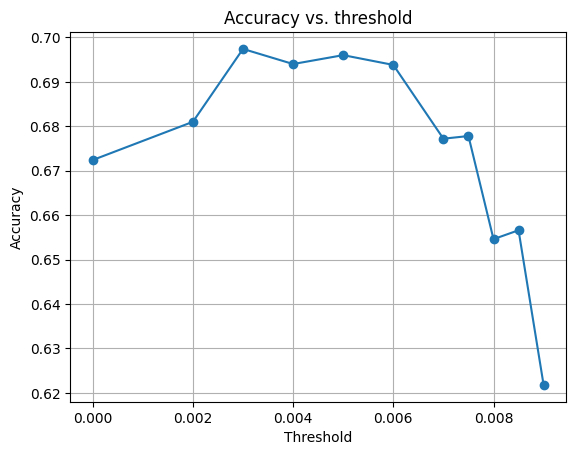

In [5]:
plt.plot(thresholds, avg_accuracies, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. threshold')
plt.grid(True)
plt.show()

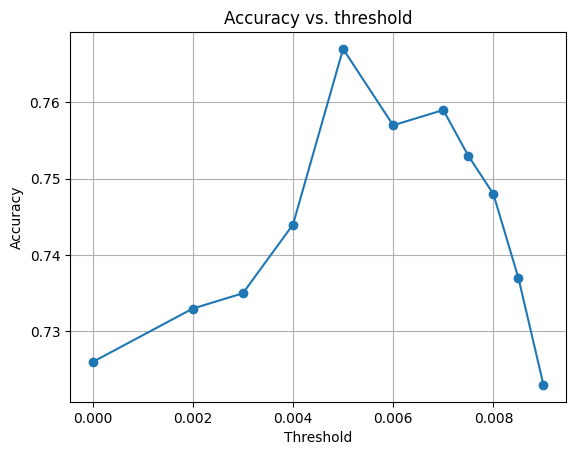

In [6]:
plt.plot(thresholds, avg_accuracies_top, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. threshold')
plt.grid(True)
plt.show()

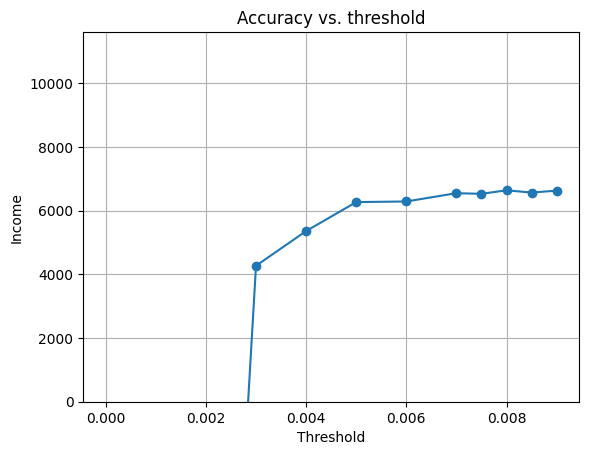

In [7]:
plt.plot(thresholds, avg_income, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Income')
plt.ylim(0)
plt.title('Accuracy vs. threshold')
plt.grid(True)
plt.show()

In [8]:
avg_income

[-92740.0,
 -22830.0,
 4270.0,
 5360.0,
 6270.0,
 6290.0,
 6550.0,
 6530.0,
 6640.0,
 6570.0,
 6630.0]